# Modeling with numerical and dummy variables only (No text)

In [7]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## week 3 imports
import missingno as msno     # msno.bar(titanic);  or msno.matrix(titanic);
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Linear and general modeling imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Feature Engineering
from sklearn.impute import SimpleImputer   # Imputation 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures   # Scale/transform/feature engineering

import patsy
# y, X = patsy.dmatrices(formula, data=diamonds, return_type='dataframe')

# GridSearch and Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# Logistic and Classification metrics
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler

# naive bayes imports
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# SVMs
from sklearn.svm import LinearSVC, SVC

# Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Import Bagging, Boosting, and Random Forests, and ExtraTrees (Extremely Randomized Trees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

import json

In [8]:
df = pd.read_csv('../../data/clean_tweets.csv')
df.head()

,airline_sentiment,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,clean_text_stem,sentiment_score,clean_word_count
0,neutral,0,I didn't today... Must mean I need to take an...,2015-02-24 11:15:48-08:00,1,2,11,0,0,0,0,1,today must mean need take anoth trip,0.000000,7
1,negative,0,"it's really aggressive to blast obnoxious ""en...",2015-02-24 11:15:36-08:00,1,2,11,0,0,0,0,1,realli aggress blast obnoxi entertain guest fa...,-0.058824,10
2,negative,0,seriously would pay $30 a flight for seats th...,2015-02-24 11:14:33-08:00,1,2,11,0,0,0,0,1,serious would pay 30 flight seat play realli b...,-0.041667,12
3,positive,0,"yes, nearly every time I fly VX this “ear wor...",2015-02-24 11:13:57-08:00,1,2,11,0,0,0,0,1,ye nearli everi time fli vx ear worm go away,0.000000,10
4,neutral,0,Really missed a prime opportunity for Men Wit...,2015-02-24 11:12:29-08:00,1,2,11,0,0,0,0,1,realli miss prime opportun men without hat par...,0.000000,11


In [9]:
X = df.drop(columns=['airline_sentiment', 'text', 'tweet_created', 'clean_text_stem'])
y = df['airline_sentiment']

In [10]:
# Finds the baseline
y.value_counts(normalize=True)

negative    0.710114
neutral     0.165570
positive    0.124316
Name: airline_sentiment, dtype: float64

In [11]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify=y, 
                                                   random_state=42)

In [12]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('abc', AdaBoostClassifier())
])

In [13]:
# Creates the pipe parameters 
pipe_params = {
    'abc__n_estimators': [100, 150], 
    'abc__learning_rate': [1.0, 0.1, 0.01],
}

In [14]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                n_jobs = 4)

In [15]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   14.1s finished


GridSearchCV(cv=5, estimator=Pipeline(steps=[('abc', AdaBoostClassifier())]),
             n_jobs=4,
             param_grid={'abc__learning_rate': [1.0, 0.1, 0.01],
                         'abc__n_estimators': [100, 150]},
             verbose=1)

In [16]:
# Returns the training and testing accuracy scores from the gridsearch
train1, test1 = gs.score(X_train, y_train), gs.score(X_test, y_test)
train1, test1

(0.7264524103831891, 0.7170930663700408)

In [17]:
gs.best_params_

{'abc__learning_rate': 1.0, 'abc__n_estimators': 100}

In [18]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('abc', AdaBoostClassifier(n_estimators=100))
])

In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('abc', AdaBoostClassifier(n_estimators=100))])

In [20]:
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.7264524103831891, 0.7170930663700408)

In [21]:
# Creates the model metrics row dataframe and saves it as a csv file to be added to the final model metrics table in the presentation
results = pd.DataFrame({'Model': ['Adaboost'], 
                        'Train_acc': [train1],
                        'Test_acc': [test1]})
results.to_csv('../../data/abc_numerical.csv')

In [22]:
importances = pipe.named_steps['abc'].feature_importances_
importances

array([0.09, 0.05, 0.  , 0.23, 0.02, 0.01, 0.01, 0.01, 0.01, 0.41, 0.16])

In [23]:
features = X.columns

In [24]:
importance_dict = pd.DataFrame({'feature_importance': importances,
                                'features': features})
top10 = importance_dict.nlargest(10, columns=['feature_importance'])
top10

,feature_importance,features
9,0.41,sentiment_score
3,0.23,tweet_hour
10,0.16,clean_word_count
0,0.09,retweet_count
1,0.05,tweet_day
4,0.02,airline_Delta
5,0.01,airline_Southwest
6,0.01,airline_US Airways
7,0.01,airline_United
8,0.01,airline_Virgin America


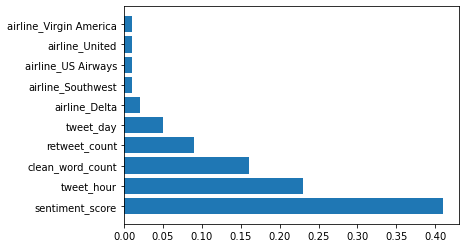

In [27]:
plt.barh(top10['features'], top10['feature_importance']);
plt.savefig('../../presentation/abc_numerical_featureImp.jpg')